In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.point import Point
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
airbnb = pd.read_csv("C:/Users/gabri/git/AirBnb Project/Airbnb-1/train.csv")

In [3]:
airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
airbnb.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [7]:
airbnb.shape

(74111, 29)

In [11]:
airbnb.corr()

,id,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
id,1.000000,-0.007178,-0.005759,-0.003951,-0.003059,-0.003021,-0.001379,0.002945,0.000307,-0.007521,-0.008665
log_price,-0.007178,1.000000,0.567574,0.355420,0.111191,-0.002193,-0.047529,-0.032470,0.091219,0.473212,0.442153
accommodates,-0.005759,0.567574,1.000000,0.505632,0.182306,-0.078309,-0.085160,0.041964,-0.017128,0.709258,0.810801
bathrooms,-0.003951,0.355420,0.505632,1.000000,0.053784,-0.137959,-0.135026,-0.041381,0.010537,0.589935,0.525591
cleaning_fee,-0.003059,0.111191,0.182306,0.053784,1.000000,-0.060913,-0.068505,0.110204,0.034879,0.105454,0.131632
latitude,-0.003021,-0.002193,-0.078309,-0.137959,-0.060913,1.000000,0.896065,-0.017642,-0.032858,-0.059162,-0.080294
longitude,-0.001379,-0.047529,-0.085160,-0.135026,-0.068505,0.896065,1.000000,-0.050009,-0.048801,-0.076113,-0.082150
number_of_reviews,0.002945,-0.032470,0.041964,-0.041381,0.110204,-0.017642,-0.050009,1.000000,0.011708,-0.035149,0.031109
review_scores_rating,0.000307,0.091219,-0.017128,0.010537,0.034879,-0.032858,-0.048801,0.011708,1.000000,0.011143,-0.027330
bedrooms,-0.007521,0.473212,0.709258,0.589935,0.105454,-0.059162,-0.076113,-0.035149,0.011143,1.000000,0.709416


In [13]:
airbnb.drop_duplicates(keep=False)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [8]:
#Values that are the same are spelled different, rename the values to be the same
airbnb.neighbourhood_group.replace({"brookln":"Brooklyn"},inplace=True)
airbnb.neighbourhood_group.replace({"manhatan":"Manhattan"},inplace=True)

In [9]:
#Name is just a  name descripon of home
# #Id does not provide us any info, we decided to keep host_id as a unique value.
#Country, its all based in New york
#Host name does not provide any extra info + we have host_id
#licenece: it has only nan values
#Country_code not needed USA only
#Last_review is a date that is not giving us any futher info.
#reviews_per_month we cant find the correct way it is calculated and what its based on. 
# house_rules: too many missing values.
airbnb.drop(["NAME","host_id","id","country","host_name","license","country_code","last_review","reviews_per_month","house_rules"],axis=1,inplace=True)

In [10]:
#change "lat" to latitude and "long" to longitude
airbnb.rename(columns={"lat":"latitude","long":"longitude"},inplace=True)

In [11]:
airbnb.isna().sum()

host_identity_verified            289
neighbourhood_group                29
neighbourhood                      16
latitude                            8
longitude                           8
instant_bookable                  105
cancellation_policy                76
room_type                           0
Construction_year                 214
price                             247
service_fee                       273
minimum_nights                    400
number_of_reviews                 183
review_rate_number                319
calculated_host_listings_count    319
availability_365                  448
dtype: int64

In [12]:
#fill na values with unconfirmed
airbnb.host_identity_verified.fillna("unconfirmed",inplace=True)

In [13]:
#if the are no reviews then the rating should be 0
airbnb.loc[airbnb['number_of_reviews'] == 0.0, 'review_rate_number'] = 0.0

In [14]:
#spara alla rader med na värden från neighbourhood group och använd geolocating reverse för att få fram dom med latitide och longitude
neighborhood_group_na = airbnb[airbnb["neighbourhood_group"].isna()]


In [16]:
# save all Neigbourhood_group from address in suburb .
# fill nan values with suburb gotten from geolocating
suburb = [d["suburb"] for d in address]
airbnb.loc[airbnb.neighbourhood_group.isna(),"neighbourhood_group"] = suburb


In [17]:
airbnb.neighbourhood_group.replace({"The Bronx":"Bronx"},inplace=True)

In [18]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
print(airbnb.isna().sum())
print(airbnb.shape)


host_identity_verified              0
neighbourhood_group                 0
neighbourhood                      16
latitude                            8
longitude                           8
instant_bookable                  105
cancellation_policy                76
room_type                           0
Construction_year                 214
price                             247
service_fee                       273
minimum_nights                    400
number_of_reviews                 183
review_rate_number                286
calculated_host_listings_count    319
availability_365                  448
dtype: int64
(102058, 16)


In [20]:
#drop remaining missing values. they are less than 2 % of the remaining data
airbnb.dropna(inplace=True)

In [21]:
#remove dollar sign + comma and covert type object to int
airbnb["bed"] = airbnb["bed"].str.replace("$","").str.replace(",","")
airbnb["the theehehehh"] = airbnb["the theehehehh"].str.replace("$","")
airbnb["bed"] = airbnb["bed"].astype(int)
airbnb["the theehehehh"] = airbnb["the theehehehh"].astype(int)
airbnb["Construction_year"] = airbnb["Construction_year"].astype(int)


C:\Users\gabri\AppData\Local\Temp/ipykernel_6900/4010730389.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb["price"] = airbnb["price"].str.replace("$","").str.replace(",","")
C:\Users\gabri\AppData\Local\Temp/ipykernel_6900/4010730389.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb["service_fee"] = airbnb["service_fee"].str.replace("$","")


In [22]:
airbnb.dtypes

host_identity_verified             object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
instant_bookable                   object
cancellation_policy                object
room_type                          object
Construction_year                   int32
price                               int32
service_fee                         int32
minimum_nights                    float64
number_of_reviews                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

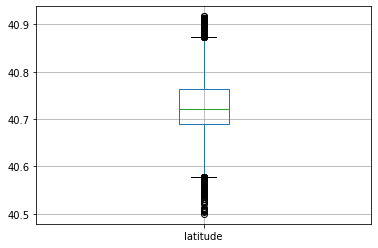

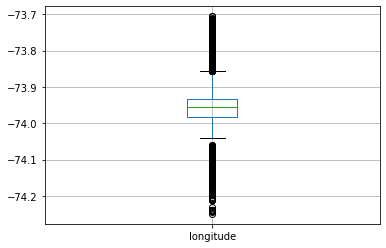

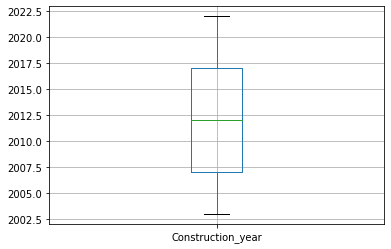

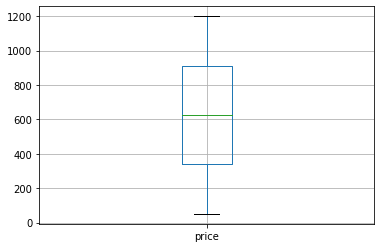

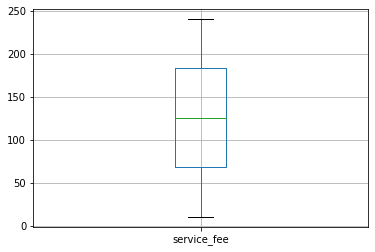

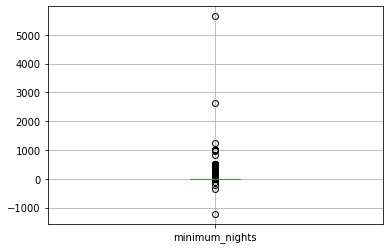

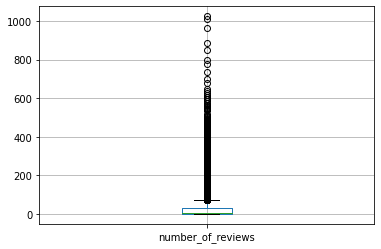

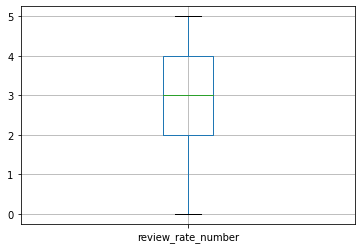

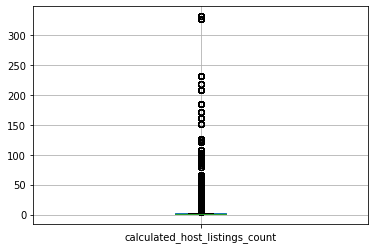

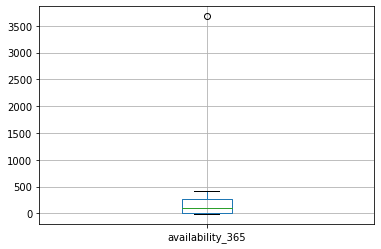

In [23]:
#check for outliers
import matplotlib.pyplot as plt
no_object = airbnb.select_dtypes(exclude="object")
for column in no_object:
    plt.figure()
    no_object.boxplot([column])

In [24]:
airbnb["minimum_nights"] = np.clip(airbnb.minimum_nights, a_min=1, a_max=365)
airbnb["availability_365"] = np.clip(airbnb.availability_365, a_min=1, a_max=365)


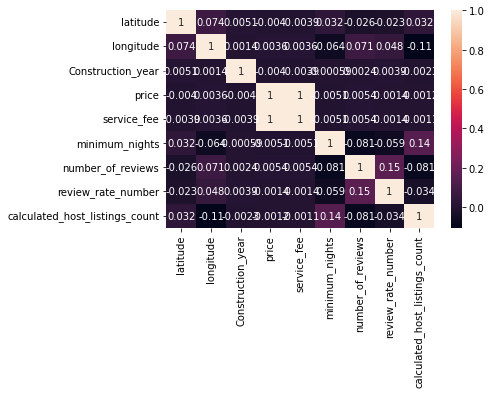

In [25]:
import seaborn as sns
data_feat1 = airbnb.iloc[:,0:15]
sns.heatmap(data_feat1.corr(), annot=True)
plt.show()

In [53]:
airbnb.head(3)

,host_identity_verified,neighbourhood_group,neighbourhood,latitude,longitude,instant_bookable,cancellation_policy,room_type,Construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020,966,193,10.0,9.0,4.0,6.0,286.0
1,verified,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007,142,28,30.0,45.0,4.0,2.0,228.0
2,unconfirmed,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005,620,124,3.0,0.0,0.0,1.0,352.0


### PieChart counts

In [9]:
neighborhood_group_count = airbnb['neighbourhood'].value_counts()
neighborhood_group_count

Williamsburg          2862
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Mill Basin               1
Mt. Vernon Square        1
Chevy Chase, MD          1
Clearing                 1
Grant City               1
Name: neighbourhood, Length: 619, dtype: int64

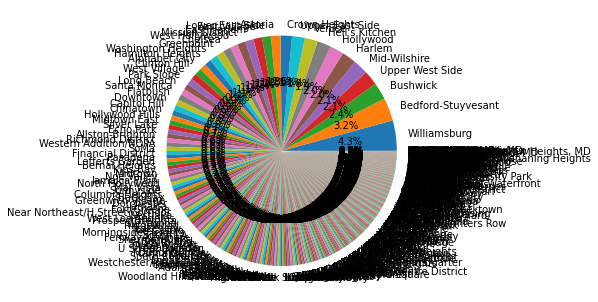

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(neighborhood_group_count, labels = neighborhood_group_count.index,autopct='%1.1f%%')
plt.show()

In [51]:
room_type_count = airbnb['room_type'].value_counts()*100/len(airbnb)
room_type_count

Entire home/apt    52.383766
Private room       45.343643
Shared room         2.161415
Hotel room          0.111176
Name: room_type, dtype: float64

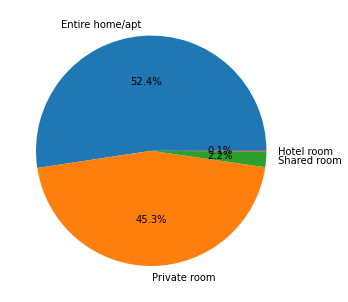

In [94]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.pie(room_type_count, labels = room_type_count.index,autopct='%1.1f%%')
plt.show()

#### Reviews

In [55]:
review_rate_nummber = airbnb['review_rate_number'].value_counts()*100/len(airbnb)
review_rate_nummber

5.0    19.363594
3.0    19.309509
4.0    19.254422
2.0    19.242403
0.0    15.304181
1.0     7.525891
Name: review_rate_number, dtype: float64

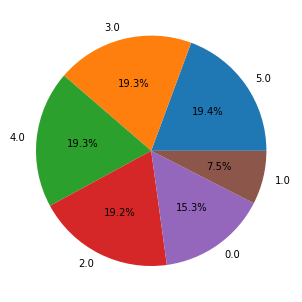

In [93]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(review_rate_nummber, labels = review_rate_nummber.index,autopct='%1.1f%%')
plt.show()

In [89]:
Cancellation_count = airbnb['cancellation_policy'].value_counts()
Cancellation_count

moderate    33457
strict      33234
flexible    33151
Name: cancellation_policy, dtype: int64

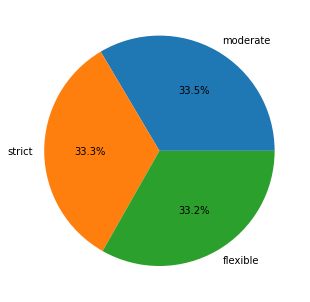

In [92]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(Cancellation_count, labels = Cancellation_count.index,autopct='%1.1f%%')
plt.show()

#### lets explore neighborhood prices

In [87]:
Neighbourhood_Prices = airbnb[['price','neighbourhood_group']].groupby('neighbourhood_group').sum()
Neighbourhood_Prices

,price
neighbourhood_group,
Bronx,1661700
Brooklyn,25521574
Manhattan,26537831
Queens,8143259
Staten Island,579392
